# Back Propagation

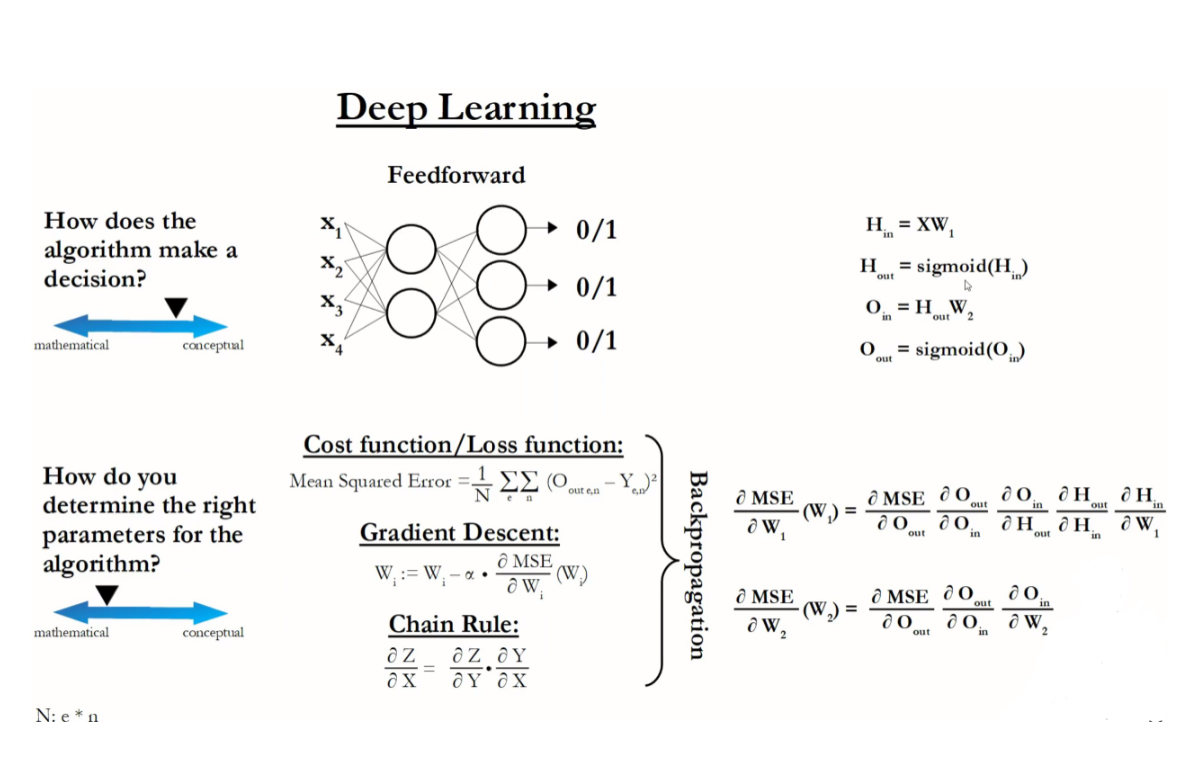

In [22]:
from IPython.display import Image
Image("Neural_Net.png")

# 1- Import key Modules

In [2]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

from IPython.display import Image
from pprint import pprint

# 2- Load Data

iris dataset

In [4]:
# load data
df = pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# one-hot encoding
one_hot_encode = pd.get_dummies(df.species)
df = df.join(one_hot_encode)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [6]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0


In [7]:
one_hot_encode.values

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [8]:
y = one_hot_encode.values
x=df[["sepal_length","sepal_width","petal_length","petal_width"]].values
N = y.size

In [9]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [11]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 3- Creating functions for building Neural Net

#### Helper Function

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### Hyperparameters

for optmization , and model building

In [13]:
learning_rate = 0.1

n_input = 4
n_hidden = 2
n_output = 3

In [14]:
np.random.seed(10)

weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# 4-Feedforward and Backpropagation

In [15]:
# feedforward
hidden_layer_inputs = np.dot(x, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [16]:
# backpropagation
output_layer_error = output_layer_outputs - y
output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

In [17]:
# weight updates using gradient desent
weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N # notice transpose
weights_1_update = np.dot(x.T, hidden_layer_delta) / N

weights_2 = weights_2 - learning_rate * weights_2_update
weights_1 = weights_1 - learning_rate * weights_1_update

In [18]:
# mse: cost function
mse = ((output_layer_outputs - y)**2).sum() / (2*N)
mse

0.1376238483304252

#### MSE after weights are updated

In [19]:
# feedforward
hidden_layer_inputs = np.dot(x, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [20]:
mse = ((output_layer_outputs - y)**2).sum() / (2*N)
mse

0.13731041772217373

There is slight decrease in cost function after updating weights. This means that we need to run feedforward and backpropagation algoritm multiple times so that weights and bias get more updates and we could see improvement in our model. Improvement means considerable amount of decrease in cost function.